In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

SEED = 42
np.random.seed(SEED)

In [2]:
df = pd.read_csv (r'C:\Users\chee\Downloads\Walmart_Store_sales 2.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
print (df)

      Store        Date  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0        14  23/12/2011             0        42.27       3.389  188.929975   
1         2  23/12/2011             0        46.66       3.112  218.999550   
2        27  24/12/2010             0        31.34       3.309  136.597273   
3         4  25/11/2011             1        47.96       3.225  129.836400   
4        10  25/11/2011             1        60.68       3.760  129.836400   
...     ...         ...           ...          ...         ...         ...   
6420     33   2/12/2011             0        59.12       3.701  129.845967   
6421     33  31/12/2010             1        52.91       3.148  127.087677   
6422     33  30/12/2011             1        51.60       3.428  130.071032   
6423     33  29/10/2010             0        71.34       3.130  126.436419   
6424     33   3/12/2010             0        52.82       3.041  126.731333   

      Unemployment  Weekly_Sales  
0            8.523    336906

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Holiday_Flag'] = df['Holiday_Flag'].astype('bool')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6425 entries, 0 to 6424
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6425 non-null   int64         
 1   Date          6425 non-null   datetime64[ns]
 2   Holiday_Flag  6425 non-null   bool          
 3   Temperature   6425 non-null   float64       
 4   Fuel_Price    6425 non-null   float64       
 5   CPI           6425 non-null   float64       
 6   Unemployment  6425 non-null   float64       
 7   Weekly_Sales  6425 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 357.8 KB


<AxesSubplot:>

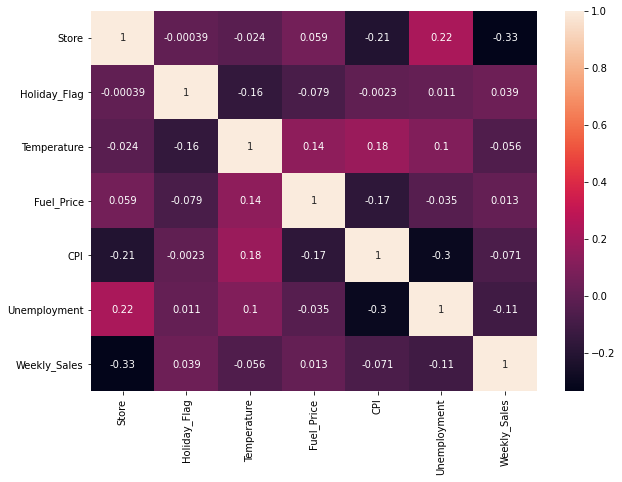

In [5]:
cor = df.corr() # quantifies the strength of relationship between the variables

fig=plt.figure(figsize=(10,7))
sns.heatmap(cor, annot=True) # annot=annotation

In [6]:
# limit to categorical data using df.select_dtypes()
df_cat = df.select_dtypes(include=['object'])

# limit to numerical data using df.select_dtypes()
df_num = df.select_dtypes(include=['number'])

In [7]:
df_num.nunique()

Store             45
Temperature     3525
Fuel_Price       892
CPI             2145
Unemployment     349
Weekly_Sales    6425
dtype: int64

In [8]:
storeDf = pd.get_dummies(df['Store'],prefix='store')
df = pd.concat([df,storeDf],axis=1)
holidayDf = pd.get_dummies(df['Holiday_Flag'],prefix='Ho')
df = pd.concat([df,holidayDf],axis=1)

In [9]:
df.corr()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,store_1,store_2,store_3,...,store_38,store_39,store_40,store_41,store_42,store_43,store_44,store_45,Ho_False,Ho_True
Store,1.000000,-0.000395,-0.024198,0.059249,-0.210583,0.223328,-0.334578,-0.255811,-0.243318,-0.232575,...,0.174051,0.185669,0.197287,0.208905,0.220523,0.232141,0.243759,0.255377,0.000395,-0.000395
Holiday_Flag,-0.000395,1.000000,-0.155806,-0.078586,-0.002310,0.010846,0.039481,-0.000064,0.000226,-0.000064,...,-0.000064,-0.000064,-0.000064,-0.000064,-0.000064,-0.000064,-0.000064,-0.000064,-1.000000,1.000000
Temperature,-0.024198,-0.155806,1.000000,0.144287,0.176750,0.100601,-0.056419,0.062281,0.062368,0.087878,...,0.078290,0.081028,-0.106590,-0.100568,0.094483,0.066953,-0.057296,-0.023789,0.155806,-0.155806
Fuel_Price,0.059249,-0.078586,0.144287,1.000000,-0.171116,-0.034929,0.013117,-0.045756,-0.044822,-0.045756,...,0.081311,-0.045756,0.027202,-0.038573,0.071291,-0.045756,-0.023923,0.019272,0.078586,-0.078586
CPI,-0.210583,-0.002310,0.176750,-0.171116,1.000000,-0.302677,-0.071448,0.170214,0.168388,0.183229,...,-0.164548,0.165353,-0.139962,0.084594,-0.164548,0.138540,-0.164548,0.056305,0.002310,-0.002310
Unemployment,0.223328,0.010846,0.100601,-0.034929,-0.302677,1.000000,-0.106008,-0.031318,-0.030435,-0.066166,...,0.411358,-0.010525,-0.257591,-0.082535,0.029185,0.155558,-0.101650,0.052161,-0.010846,0.010846
Weekly_Sales,-0.334578,0.039481,-0.056419,0.013117,-0.071448,-0.106008,1.000000,0.139130,0.236009,-0.173881,...,-0.178490,0.110723,-0.021410,0.061149,-0.132139,-0.111249,-0.201027,-0.069791,-0.039481,0.039481
store_1,-0.255811,-0.000064,0.062281,-0.045756,0.170214,-0.031318,0.139130,1.000000,-0.022682,-0.022763,...,-0.022763,-0.022763,-0.022763,-0.022763,-0.022763,-0.022763,-0.022763,-0.022763,0.000064,-0.000064
store_2,-0.243318,0.000226,0.062368,-0.044822,0.168388,-0.030435,0.236009,-0.022682,1.000000,-0.022682,...,-0.022682,-0.022682,-0.022682,-0.022682,-0.022682,-0.022682,-0.022682,-0.022682,-0.000226,0.000226
store_3,-0.232575,-0.000064,0.087878,-0.045756,0.183229,-0.066166,-0.173881,-0.022763,-0.022682,1.000000,...,-0.022763,-0.022763,-0.022763,-0.022763,-0.022763,-0.022763,-0.022763,-0.022763,0.000064,-0.000064


In [10]:
X = df[['store_1','store_2','store_3','store_4','store_5','store_6','store_7','store_8','store_9','store_10','store_11',
       'store_12','store_13','store_14','store_15','store_16','store_17','store_18','store_19','store_20','store_21','store_22',
        'store_23','store_24','store_25','store_26','store_27','store_28','store_29','store_30','store_31','store_32','store_33',
       'store_34','store_35','store_36','store_37','store_38','store_39','store_40','store_41','store_42','store_43','store_44','store_45',
        'Ho_True','Ho_False','Temperature','CPI','Unemployment']]
y = df['Weekly_Sales']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle=True, random_state=SEED)

In [12]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
# get importance
importance = regressor.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 10583693.66974
Feature: 1, Score: 10942509.12416
Feature: 2, Score: 9429533.06514
Feature: 3, Score: 11041980.71550
Feature: 4, Score: 9326523.79431
Feature: 5, Score: 10576391.86414
Feature: 6, Score: 9592462.07556
Feature: 7, Score: 9912226.09487
Feature: 8, Score: 9552452.98160
Feature: 9, Score: 10886880.35199
Feature: 10, Score: 10384789.72842
Feature: 11, Score: 10112041.94320
Feature: 12, Score: 10966427.04653
Feature: 13, Score: 11045261.51613
Feature: 14, Score: 9624850.50705
Feature: 15, Score: 9508040.94490
Feature: 16, Score: 9863953.33896
Feature: 17, Score: 10099764.86603
Feature: 18, Score: 10434368.01113
Feature: 19, Score: 11104287.18344
Feature: 20, Score: 9789241.67712
Feature: 21, Score: 10034919.85728
Feature: 22, Score: 10319169.72978
Feature: 23, Score: 10373922.54807
Feature: 24, Score: 9720813.95300
Feature: 25, Score: 9994860.64419
Feature: 26, Score: 10783963.42669
Feature: 27, Score: 10418689.80718
Feature: 28, Score: 9570116.48040
Feature

In [26]:
own_pred = regressor.predict(X_test.iloc[[0]])
print("My target value is   =", str(own_pred[0]))
print("My observed value is =", str(y_test.iloc[0]))

My target value is   = 1895692.0
My observed value is = 2042581.71


In [20]:
y_pred = regressor.predict(X_test)

In [21]:
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [22]:
compare_df

,Actual,Predicted
324,2042581.71,1895692.0
5395,465408.72,448916.0
6084,311906.70,316486.0
6323,268929.03,301216.0
381,2008344.92,2055895.0
...,...,...
41,2495630.51,2011691.0
1643,1409515.73,1356953.0
3464,911807.02,1019600.0
1608,1417616.81,1348323.0


In [17]:
print('Coefficients: \n', regressor.coef_)

# The mean squared error
print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: {:.6f}'.format(r2_score(y_test, y_pred)))

Coefficients: 
 [ 1.05836937e+07  1.09425091e+07  9.42953307e+06  1.10419807e+07
  9.32652379e+06  1.05763919e+07  9.59246208e+06  9.91222609e+06
  9.55245298e+06  1.08868804e+07  1.03847897e+07  1.01120419e+07
  1.09664270e+07  1.10452615e+07  9.62485051e+06  9.50804094e+06
  9.86395334e+06  1.00997649e+07  1.04343680e+07  1.11042872e+07
  9.78924168e+06  1.00349199e+07  1.03191697e+07  1.03739225e+07
  9.72081395e+06  9.99486064e+06  1.07839634e+07  1.04186898e+07
  9.57011648e+06  9.46885579e+06  1.04272165e+07  1.01972694e+07
  9.28276773e+06  9.99995395e+06  9.93186638e+06  9.40483108e+06
  9.55506508e+06  9.48294790e+06  1.04783542e+07  9.90301860e+06
  1.02650307e+07  9.57112290e+06  9.70182013e+06  9.27836861e+06
  9.81601864e+06  8.38808474e+15  8.38808474e+15 -6.54103651e+02
 -3.53622819e+02 -1.73128809e+04]
Mean squared error: 23784034361.55
Coefficient of determination: 0.927003


In [18]:
print("Regression model's training score = {:.6f}".format(regressor.score(X_train, y_train)))
print("Regression model's test score     = {:.6f}".format(regressor.score(X_test, y_test)))

Regression model's training score = 0.930215
Regression model's test score     = 0.927003


Multiple Linear Regression:

Accuracy: 93.02145815179678
Mean Absolute Error: 93223.29362363918
Mean Squared Error: 23784034361.55122
Root Mean Squared Error: 154220.73259309598


C:\Users\chee\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Weekly_Sales'>

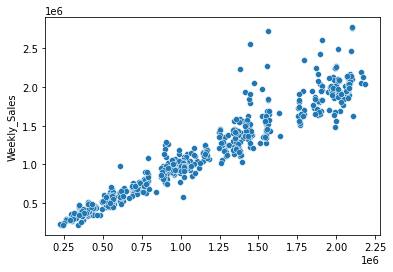

In [19]:
print('Multiple Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(y_pred, y_test)